In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Численное дифференцирование

In [2]:
a, b, N = 0, 6, 50
x = np.linspace(a, b, N + 1)
y = np.sin(x)
x, y

(array([0.  , 0.12, 0.24, 0.36, 0.48, 0.6 , 0.72, 0.84, 0.96, 1.08, 1.2 ,
        1.32, 1.44, 1.56, 1.68, 1.8 , 1.92, 2.04, 2.16, 2.28, 2.4 , 2.52,
        2.64, 2.76, 2.88, 3.  , 3.12, 3.24, 3.36, 3.48, 3.6 , 3.72, 3.84,
        3.96, 4.08, 4.2 , 4.32, 4.44, 4.56, 4.68, 4.8 , 4.92, 5.04, 5.16,
        5.28, 5.4 , 5.52, 5.64, 5.76, 5.88, 6.  ]),
 array([ 0.        ,  0.11971221,  0.23770263,  0.35227423,  0.46177918,
         0.56464247,  0.65938467,  0.74464312,  0.81919157,  0.88195781,
         0.93203909,  0.9687151 ,  0.99145835,  0.99994172,  0.9940432 ,
         0.97384763,  0.93964547,  0.89192865,  0.83138346,  0.75888071,
         0.67546318,  0.58233065,  0.48082261,  0.37239904,  0.25861935,
         0.14112001,  0.02159098, -0.09824859, -0.21667508, -0.33198519,
        -0.44252044, -0.54669105, -0.64299874, -0.73005836, -0.80661775,
        -0.87157577, -0.92399816, -0.96313093, -0.98841125, -0.99947552,
        -0.99616461, -0.97852613, -0.94681378, -0.90148366, -0.84318

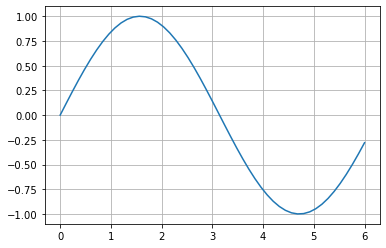

In [3]:
# построим график данной функции
plt.plot(x, y)
plt.grid()
plt.show()


# Левая разность: $\frac{y_{i}-y_{i-1}}{h}$
# Правая разность: $\frac{y_{i+1}-y_{i}}{h}$
# Центральная разность: $\frac{y_{i+1}-y_{i-1}}{2h}$

In [6]:
x = np.linspace(0, 0.4, 5)
y = np.array([1.0, 1.1052, 1.2214, 1.3499, 1.4918])
y

array([1.    , 1.1052, 1.2214, 1.3499, 1.4918])

In [9]:
# Правая разность
rdf = np.zeros(4)
for i in range(4):
    rdf[i] = (y[i+1]-y[i])/(x[i+1] - x[i])

In [15]:
# Левая разность
ldf = np.zeros(4)
for i in range(1,5):
    ldf[i-1] = (y[i]-y[i-1])/(x[i] - x[i-1])


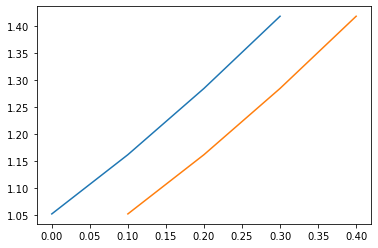

In [16]:
plt.plot(x[0:-1], rdf)
plt.plot(x[1::], ldf)

plt.show()

## $F = \int\limits_{x_0}^{x_1}ydx$
## $y =\frac{x}{(3x+4)^2}, x_0=-1,\,x_1 = 1, h_1=0.5, h_2 = 0.25$

In [30]:
f = lambda x: x/(3*x+4)**2 
x = np.linspace(-1, 1, 5)
F = np.zeros(len(x))
h1 = 0.5
for i in range(len(x)-1):
    F[i+1] =F[i] + h1*f((x[i] + x[i+1])/2)
    
for i in range(len(x)):
    print("i=", i, "x=", x[i], 'y=', f(x[i]), "F=", F[i])

    

i= 0 x= -1.0 y= -1.0 F= 0.0
i= 1 x= -0.5 y= -0.08 F= -0.12244897959183673
i= 2 x= 0.0 y= 0.0 F= -0.13428329911846396
i= 3 x= 0.5 y= 0.01652892561983471 F= -0.1287431329134778
i= 4 x= 1.0 y= 0.02040816326530612 F= -0.1191431329134778


In [32]:
h2 = 0.25
x2 = np.linspace(-1, 1, 9)
F2 = np.zeros(len(x2))
for i in range(len(x2)-1):
    F2[i+1]= F2[i]+h2*f((x2[i] + x2[i+1])/2)


for i in range(len(x2)):
    print("i=", i, "x=", x2[i], 'y=', f(x2[i]), "F=", F2[i])


    

i= 0 x= -1.0 y= -1.0 F= 0.0
i= 1 x= -0.75 y= -0.24489795918367346 F= -0.11570247933884298
i= 2 x= -0.5 y= -0.08 F= -0.15030455546341046
i= 3 x= -0.25 y= -0.023668639053254437 F= -0.16164671047286225
i= 4 x= 0.0 y= 0.0 F= -0.16402483175704774
i= 5 x= 0.25 y= 0.0110803324099723 F= -0.16239217869582326
i= 6 x= 0.5 y= 0.01652892561983471 F= -0.15882287471010048
i= 7 x= 0.75 y= 0.0192 F= -0.15429593944527475
i= 8 x= 1.0 y= 0.02040816326530612 F= -0.14931195938119501


# Уточнение численного интегрирования методом Рунге-Ромберга-Ричардсона:
### Если интеграл посчитан на сетке с шагом $h$ и $F = F_h +O(h^p)$, а также посчитан на сетке с шагом $kh$ и $F=F_{kh} + O((kh)^p)$, то приближенное значение интеграла можно уточнить по формуле:

# $$F =  \int\limits_{x_0}^{x_1}f(x)dx = F_h + \frac{F_h-F_{kh}}{k^p-1} + O(h^{p+1})$$

## Метод прямоугольников (средних): $O(h^2)$, остаточный член $R\leq \frac{b-a}{24}h^2M_2$
## Метод трапеций: $O(h^2)$, остаточный член $R\leq \frac{b-a}{12}h^2M_2$
## Метод Симпсона: $O(h^4)$, , остаточный член $R\leq \frac{b-a}{180}h^4M_4$,
## где $M_2=\max{|f''(x)|},\;M_4=\max{|f^{(4)}(x)|},\; x\in [a,b]$

In [50]:
F[-1], F2[-1] # F_h F_{kh}

(-0.1191431329134778, -0.14931195938119501)

In [49]:
# уточнённое значение интеграла
F_corr = F2[-1] + (F2[-1] - F[-1])/((2)**2-1)
F_corr

-0.15936823487043408

In [38]:
# точное значение
import sympy as sm
x = sm.symbols('x')
Fs = sm.integrate(x/(3*x+4)**2, (x, -1, 1))
Fs.evalf(5)

-0.16474

In [46]:
# приближенное значение
from scipy.integrate import quad
Ff = quad(f, -1, 1)
Ff[0]

-0.16474014216845734

# Д/з 1. Вычислить свой интегал методами прямоугольков, трапеций и Симпсона для шагов $h1,\;h_2$.
# 2. Уточнить значение интеграла с помощью метода Рунге... 
# 3. Посчитать абсолютную погрещность вычисленного интеграла.
# 4. Вычислить оценку остаточного члена, вычисляя производные разностными формулами.